# Let's Build An MLP

- We build an MLP for MNIST digit recognition problem.
- MNIST dataset consist of 60k handwritten images of numbers from 0-9 and is commonly used for training various image processing systems.
- Each datpoint in the dataset is an image of size (28,28) having pixel values ranging from 0-255 on the greyscale.
- It can be downloaded from [here](https://www.kaggle.com/c/digit-recognizer/data).
- For more information on MNIST dataset, click [here](https://en.wikipedia.org/wiki/MNIST_database).

### Loading Necessary Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
from keras.models import Sequential 
from keras.layers import Dense, Activation 

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Loading Data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of test examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of test examples : 10000 and each image is of shape (28, 28)


- We observe that each datapoint is a 2-d vector of size (28,28).
- We convert each datapoint into a 1-d column vector of size (784).
- That way, it will be easy to feed in inputs to the input layer of our MLP.

In [4]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

print("Each image is of shape (%d)"%(X_train.shape[1]))

Each image is of shape (784)


- Let's see how a datapoint looks like:

In [5]:
print(X_train[5])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  13  25 100 122   7   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  33 151 208 252 252 252 146   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211 252 232
  40   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  15
 152 239 252 252 252 216  31  37 252 252  60   0   

- Let's normalize each cell value so that each cell value lies within the same distribution.
- We normalize using formula: 
> $$ \frac{X-X_{min}}{X_{max}-X_{min}}$$
- Here, X_min=0 and X_max=255.
- Hence, 
> $$ \frac{X-X_{min}}{X_{max}-X_{min}} = \frac{X}{255}$$

In [6]:
X_train = X_train/255
X_test = X_test/255

- Our datapoint can be any digit from 0-9.
- Let's convert the output into one-hot encoded vector of size 10.
- This will be helpful for our MLP to recognize a given image datapoint into a digit from 0-9.

In [7]:
print("Class label of the example image datapoint :", y_train[5])

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a one-hot encoded vector : ",Y_train[5])

Class label of the example image datapoint : 2
After converting the output into a one-hot encoded vector :  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


## Building The MLP

- First, we define our model to be Sequetial().
- An artificial neural network is a sequential model.
  - The Sequential model is a linear stack of layers.
- add() method is used to add a layer into the MLP.
- summary() method prints the number of weight parameters and bias(if use_bias is True) parameters calculated in each layer.
- 'Dense' implements the operation: output = activation(dot(input, kernel) + bias) 
  - Where:
    - activation() is the element-wise activation function passed as the activation argument,
    - kernel is a weights matrix created by the layer,
    - bias is a bias vector created by the layer (only applicable if use_bias is True).
  - output = activation(dot(input, kernel) + bias)
    - y = activation(WT. X + b)

- compile() method configures the learning process before training a model.
- Keras models are trained on Numpy arrays of input data and labels. 
- For training a model, we typically use the  fit() method.
  - fit() method trains the model for a fixed number of epochs (iterations on a dataset).
    - It returns a History object.
    - History attribute is a record of training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).
- Finally, we evaluate the model on the test data via evaluate()

In [8]:
# Necessary model parameters:
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 128 
nb_epoch = 15

- Activation function used in each layer is: Sigmoid
- Since, the MLP is supposed to recognise the digits from 0-9, which is basically a 10-class classification task.
  - Hence, we use Softmax activation function in the output layer.
- For optimizing the gradients, we use Adam optimizer.

In [9]:
#Creating 4-Layered Perceptron

model = Sequential() 
model.add(Dense(84, input_dim=input_dim, activation='sigmoid')) #Input layer
model.add(Dense(42, activation='sigmoid')) #Hidden layer 1
model.add(Dense(21, activation='sigmoid')) #Hidden layer 2
model.add(Dense(output_dim, activation='softmax')) #Output layer

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 84)                65940     
_________________________________________________________________
dense_2 (Dense)              (None, 42)                3570      
_________________________________________________________________
dense_3 (Dense)              (None, 21)                903       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                220       
Total params: 70,633
Trainable params: 70,633
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=2, validation_data=(X_test, Y_test)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
 - 4s - loss: 1.4528 - accuracy: 0.6042 - val_loss: 0.7622 - val_accuracy: 0.8577
Epoch 2/15
 - 2s - loss: 0.5242 - accuracy: 0.8939 - val_loss: 0.3665 - val_accuracy: 0.9168
Epoch 3/15
 - 2s - loss: 0.2964 - accuracy: 0.9315 - val_loss: 0.2495 - val_accuracy: 0.9384
Epoch 4/15
 - 2s - loss: 0.2137 - accuracy: 0.9466 - val_loss: 0.1937 - val_accuracy: 0.9492
Epoch 5/15
 - 2s - loss: 0.1689 - accuracy: 0.9557 - val_loss: 0.1708 - val_accuracy: 0.9542
Epoch 6/15
 - 2s - loss: 0.1408 - accuracy: 0.9627 - val_loss: 0.1468 - val_accuracy: 0.9612
Epoch 7/15
 - 2s - loss: 0.1202 - accuracy: 0.9679 - val_loss: 0.1357 - val_accuracy: 0.9620
Epoch 8/15
 - 2s - loss: 0.1043 - accuracy: 0.9720 - val_loss: 0.1260 - val_accuracy: 0.9648
Epoch 9/15
 - 2s - loss: 0.0920 - accuracy: 0.9755 - val_loss: 0.1170 - val_accuracy: 0.9683
Epoch 10/15
 - 2s - loss: 0.0810 - accuracy: 0.9785 - val_loss: 0.1095 - val_accuracy: 0.9686
Epoch 11/15
 - 2s -

### Evaluating model

In [11]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.09737721739485859
Test accuracy: 0.972599983215332


- The function below is used to update the plots for each epoch and error.

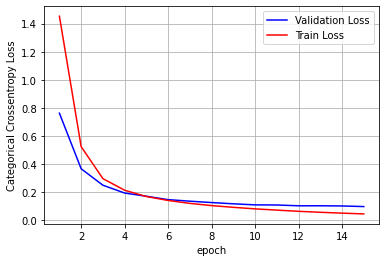

In [12]:
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)